Live view data prepare
---

# load photos

In [150]:
import PIL
import os
import numpy as np

live_view_folder = '../photos/live_view/'
photo_files = os.listdir(live_view_folder)

def import_image(path):
    image_data = False
    try:
        with PIL.Image.open(path) as an_image:
            image_data = an_image.copy()
        return image_data
    except:
        pass

live_images = [
    import_image( os.path.join(live_view_folder, file))
    for file in photo_files if file.endswith('.jpg')         
]

In [151]:
import datetime as dt
import pandas as pd

In [152]:
#the last few don't exist yet.
live_images = live_images[:911]

In [153]:
all_live_images = np.array([
    np.array(image)
    for image in live_images
])

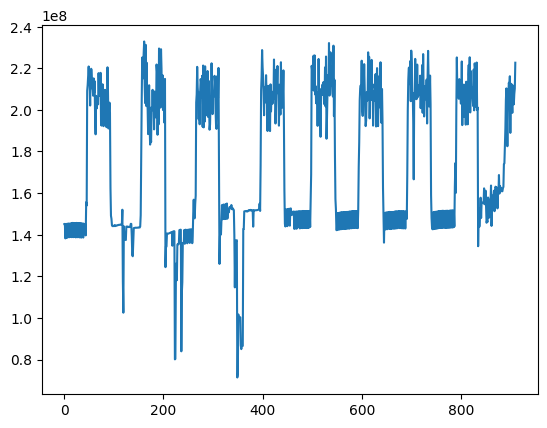

In [154]:
#get some statistics on each image
sums = [
    np.sum(image)
    for image in live_images
]

import matplotlib.pyplot as plt

plt.plot(sums)
plt.title('total brightness

In [155]:
np.unique([np.array(image).shape for image in live_images])


array([   3,  720, 1024])

all images are 1024x720x3

In [156]:
exif_data = [
    [thing
    for thing in live_image.getexif().items()]
    for live_image in live_images
]

exif_data[:4]

[[(296, 2),
  (34665, 300),
  (271, 'RECONYX'),
  (272, 'HF2 PRO COVERT\x00\x00\x00\x00\x00'),
  (306, '2024:09:17 19:30:00'),
  (531, 2),
  (282, 72.0),
  (283, 72.0)],
 [(296, 2),
  (34665, 300),
  (271, 'RECONYX'),
  (272, 'HF2 PRO COVERT\x00\x00\x00\x00\x00'),
  (306, '2024:09:17 19:45:00'),
  (531, 2),
  (282, 72.0),
  (283, 72.0)],
 [(296, 2),
  (34665, 300),
  (271, 'RECONYX'),
  (272, 'HF2 PRO COVERT\x00\x00\x00\x00\x00'),
  (306, '2024:09:17 20:00:00'),
  (531, 2),
  (282, 72.0),
  (283, 72.0)],
 [(296, 2),
  (34665, 300),
  (271, 'RECONYX'),
  (272, 'HF2 PRO COVERT\x00\x00\x00\x00\x00'),
  (306, '2024:09:17 20:15:00'),
  (531, 2),
  (282, 72.0),
  (283, 72.0)]]

In [157]:
#image dataframe.

codes = [296, 34665, 271, 272, 306, 531, 282, 283]

col_to_code = dict(zip(
    range(8),
    codes
))

descriptions = [
    'Resolution unit',
    'ExifIFDPointer',
    'Make',
    'Model',
    'date',
    'YCbCrPositioning',
    'XResolution',
    'YResolution'    
]

code_to_description = dict(zip( codes, descriptions))


col_to_description = dict(zip(range(8), descriptions))

idf = pd.DataFrame(exif_data)

idf.rename(columns = col_to_description, inplace=True)

idf = idf.map(lambda entry: entry[1])
idf

,Resolution unit,ExifIFDPointer,Make,Model,date,YCbCrPositioning,XResolution,YResolution
0,2,300,RECONYX,HF2 PRO COVERT     ,2024:09:17 19:30:00,2,72.0,72.0
1,2,300,RECONYX,HF2 PRO COVERT     ,2024:09:17 19:45:00,2,72.0,72.0
2,2,300,RECONYX,HF2 PRO COVERT     ,2024:09:17 20:00:00,2,72.0,72.0
3,2,300,RECONYX,HF2 PRO COVERT     ,2024:09:17 20:15:00,2,72.0,72.0
4,2,300,RECONYX,HF2 PRO COVERT     ,2024:09:17 20:30:00,2,72.0,72.0
...,...,...,...,...,...,...,...,...
906,2,300,RECONYX,HF2 PRO COVERT     ,2024:09:26 11:45:00,2,72.0,72.0
907,2,300,RECONYX,HF2 PRO COVERT     ,2024:09:26 12:00:00,2,72.0,72.0
908,2,300,RECONYX,HF2 PRO COVERT     ,2024:09:26 12:01:49,2,72.0,72.0
909,2,300,RECONYX,HF2 PRO COVERT     ,2024:09:26 12:15:00,2,72.0,72.0


In [158]:
idf['date'] = pd.to_datetime(idf['date'], format = '%Y:%m:%d %H:%M:%S')

idf

,Resolution unit,ExifIFDPointer,Make,Model,date,YCbCrPositioning,XResolution,YResolution
0,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-17 19:30:00,2,72.0,72.0
1,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-17 19:45:00,2,72.0,72.0
2,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-17 20:00:00,2,72.0,72.0
3,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-17 20:15:00,2,72.0,72.0
4,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-17 20:30:00,2,72.0,72.0
...,...,...,...,...,...,...,...,...
906,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-26 11:45:00,2,72.0,72.0
907,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-26 12:00:00,2,72.0,72.0
908,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-26 12:01:49,2,72.0,72.0
909,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-26 12:15:00,2,72.0,72.0


In [161]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Resolution unit   911 non-null    int64         
 1   ExifIFDPointer    911 non-null    int64         
 2   Make              911 non-null    object        
 3   Model             911 non-null    object        
 4   date              911 non-null    datetime64[ns]
 5   YCbCrPositioning  911 non-null    int64         
 6   XResolution       911 non-null    object        
 7   YResolution       911 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 57.1+ KB


<Axes: xlabel='date', ylabel='Resolution unit'>

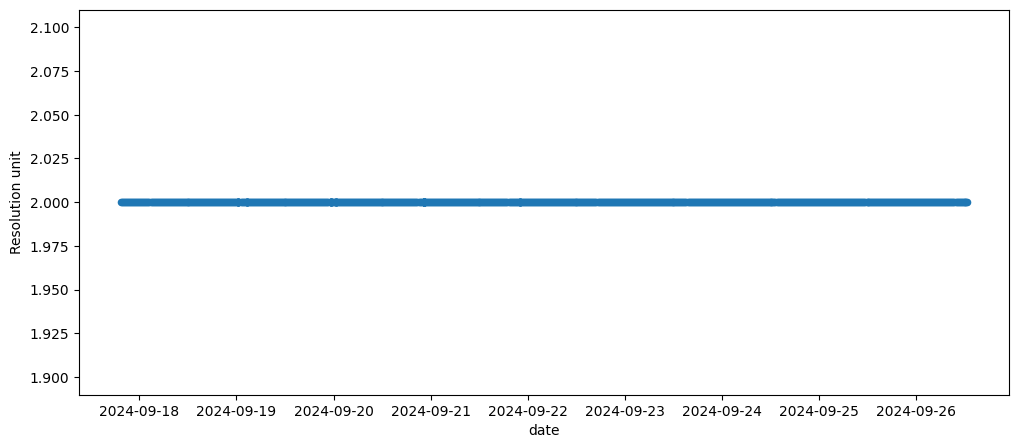

In [159]:
idf.plot('date', 'Resolution unit', kind = 'scatter', figsize = (12,5))

In [160]:
idf

,Resolution unit,ExifIFDPointer,Make,Model,date,YCbCrPositioning,XResolution,YResolution
0,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-17 19:30:00,2,72.0,72.0
1,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-17 19:45:00,2,72.0,72.0
2,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-17 20:00:00,2,72.0,72.0
3,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-17 20:15:00,2,72.0,72.0
4,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-17 20:30:00,2,72.0,72.0
...,...,...,...,...,...,...,...,...
906,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-26 11:45:00,2,72.0,72.0
907,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-26 12:00:00,2,72.0,72.0
908,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-26 12:01:49,2,72.0,72.0
909,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-26 12:15:00,2,72.0,72.0


In [165]:
np.array(live_images[0]).shape

(720, 1024, 3)

In [170]:
#save image shape
for index in idf.index:
    # print(index)
    idf.loc[index, 'image_shape'] = str(np.array(live_images[int(index)]).shape)

#save some statistics about each image

#get the sum of the numpy array data
for index in idf.index:
    idf.loc[index, 'sum_brightness'] = np.array(live_images[index]).sum()
    
idf

,Resolution unit,ExifIFDPointer,Make,Model,date,YCbCrPositioning,XResolution,YResolution,image_shape,sum_brightness
0,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-17 19:30:00,2,72.0,72.0,"(720, 1024, 3)",145126194.0
1,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-17 19:45:00,2,72.0,72.0,"(720, 1024, 3)",145193808.0
2,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-17 20:00:00,2,72.0,72.0,"(720, 1024, 3)",138221787.0
3,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-17 20:15:00,2,72.0,72.0,"(720, 1024, 3)",145079076.0
4,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-17 20:30:00,2,72.0,72.0,"(720, 1024, 3)",145181379.0
...,...,...,...,...,...,...,...,...,...,...
906,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-26 11:45:00,2,72.0,72.0,"(720, 1024, 3)",207660669.0
907,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-26 12:00:00,2,72.0,72.0,"(720, 1024, 3)",202638375.0
908,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-26 12:01:49,2,72.0,72.0,"(720, 1024, 3)",207660801.0
909,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-26 12:15:00,2,72.0,72.0,"(720, 1024, 3)",210234314.0


<Axes: xlabel='date'>

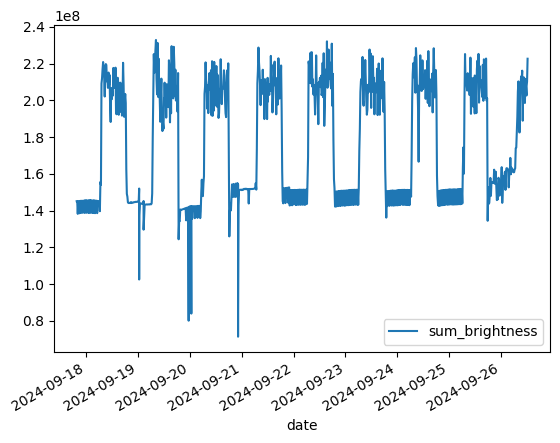

In [172]:
idf.plot(x='date', y='sum_brightness')

In [177]:
idf.loc[idf['sum_brightness'] == idf['sum_brightness'].drop([349, 350]).min()]

,Resolution unit,ExifIFDPointer,Make,Model,date,YCbCrPositioning,XResolution,YResolution,image_shape,sum_brightness
223,2,300,RECONYX,HF2 PRO COVERT     ,2024-09-19 23:23:58,2,72.0,72.0,"(720, 1024, 3)",80078049.0


In [199]:
def display_value_counts(dataframe, column, vc_limit = 5, normalize = True):
    value_counts = dataframe[column].value_counts(normalize = normalize)
    if len(value_counts) <= vc_limit:
        print(value_counts)
    else:
        print(f"{column} has \t{len(value_counts)} distinct values")

hbar = '='*50

print(hbar)
for column in idf.columns:
    display_value_counts(idf, column)
    print(hbar)


Resolution unit
2    1.0
Name: proportion, dtype: float64
ExifIFDPointer
300    1.0
Name: proportion, dtype: float64
Make
RECONYX    1.0
Name: proportion, dtype: float64
Model
HF2 PRO COVERT         1.0
Name: proportion, dtype: float64
date has 	905 distinct values
YCbCrPositioning
2    1.0
Name: proportion, dtype: float64
XResolution
72.0    1.0
Name: proportion, dtype: float64
YResolution
72.0    1.0
Name: proportion, dtype: float64
image_shape
(720, 1024, 3)    1.0
Name: proportion, dtype: float64
sum_brightness has 	908 distinct values


In [203]:
idf['date'].value_counts(ascending = False)[:20]

date
2024-09-20 22:18:02    2
2024-09-20 22:17:55    2
2024-09-20 22:30:00    2
2024-09-20 22:17:53    2
2024-09-19 00:27:48    2
2024-09-20 22:17:48    2
2024-09-17 19:30:00    1
2024-09-23 10:00:00    1
2024-09-23 10:45:00    1
2024-09-23 10:30:00    1
2024-09-23 10:15:00    1
2024-09-23 09:30:00    1
2024-09-23 09:45:00    1
2024-09-23 11:15:00    1
2024-09-23 09:15:00    1
2024-09-23 09:00:00    1
2024-09-23 08:45:00    1
2024-09-23 11:00:00    1
2024-09-23 12:00:00    1
2024-09-23 11:30:00    1
Name: count, dtype: int64

In [211]:
sum_brightness_vcs = idf['sum_brightness'].value_counts(ascending = False)
#for every sum_brightness vcs greater than 1, get the entries with that value.

for thing in sum_brightness_vcs[sum_brightness_vcs:
    pass

In [219]:
#strange. there are six duplicate sets of times.
#but only 3 duplicate sets of sum brightness. So these aren't all just copies.

for this_sum in sum_brightness_vcs.index:
    if sum_brightness_vcs[this_sum] > 1:
        print(idf.loc[ idf['sum_brightness'] == this_sum ])

     Resolution unit  ExifIFDPointer     Make                Model  \
338                2             300  RECONYX  HF2 PRO COVERT        
339                2             300  RECONYX  HF2 PRO COVERT        

                   date  YCbCrPositioning XResolution YResolution  \
338 2024-09-20 22:17:53                 2        72.0        72.0   
339 2024-09-20 22:17:53                 2        72.0        72.0   

        image_shape  sum_brightness  
338  (720, 1024, 3)     152279781.0  
339  (720, 1024, 3)     152279781.0  
     Resolution unit  ExifIFDPointer     Make                Model  \
122                2             300  RECONYX  HF2 PRO COVERT        
123                2             300  RECONYX  HF2 PRO COVERT        

                   date  YCbCrPositioning XResolution YResolution  \
122 2024-09-19 00:27:48                 2        72.0        72.0   
123 2024-09-19 00:27:48                 2        72.0        72.0   

        image_shape  sum_brightness  
122  (720,

In [232]:
idf.loc[this_date_mask].index

Index([346, 347], dtype='int64')

In [233]:
#ok, so the three sets with the same sum are all taken at the same time. These may be repeat images.

#so the other three sets are photos taken at different times with the same sum brightness. What're the odds of that??

date_vcs = idf['date'].value_counts(ascending = False)

same_date_index = []

for this_date in date_vcs.index:
    if date_vcs[this_date] > 1:
        this_date_mask = idf['date'] == this_date
        print(idf.loc[ this_date_mask ])
        same_date_index = same_date_index +  list(idf.loc[this_date_mask].index)
same_date_index

     Resolution unit  ExifIFDPointer     Make                Model  \
346                2             300  RECONYX  HF2 PRO COVERT        
347                2             300  RECONYX  HF2 PRO COVERT        

                   date  YCbCrPositioning XResolution YResolution  \
346 2024-09-20 22:18:02                 2        72.0        72.0   
347 2024-09-20 22:18:02                 2        72.0        72.0   

        image_shape  sum_brightness  
346  (720, 1024, 3)     136269384.0  
347  (720, 1024, 3)     137175582.0  
     Resolution unit  ExifIFDPointer     Make                Model  \
341                2             300  RECONYX  HF2 PRO COVERT        
342                2             300  RECONYX  HF2 PRO COVERT        

                   date  YCbCrPositioning XResolution YResolution  \
341 2024-09-20 22:17:55                 2        72.0        72.0   
342 2024-09-20 22:17:55                 2        72.0        72.0   

        image_shape  sum_brightness  
341  (720,

[346, 347, 341, 342, 361, 362, 338, 339, 122, 123, 333, 334]

In [243]:
#show all same-date guys
idf.loc[same_date_index]

#add a new column linking them to the other
for index, record in idf.iterrows():
    this_date = record['date']
    this_brightness = record['sum_brightness']
    shared_date_index = idf.loc[(idf.drop(index)['date'] == this_date)].index
    shared_brightness_index = idf.loc[(idf.drop(index)['sum_brightness'] == this_brightness)].index
    idf.loc[index, 'shares_date_with'] = str(shared_date_index)
    idf.loc[index, 'shares_brightness_with'] = str(shared_brightness_index)

idf

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).